In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/Social Media Usage India.csv")

In [ ]:
df.head()

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,...,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,...,770,400,900,120,0,"1,170","2,190","1,670",520,"1,020"
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,...,0,0,"5,000","2,000","8,160",0,"15,160","11,000","4,160","7,000"
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,...,"1,000","1,000","7,000","2,000","2,500","2,000","13,500","8,500","5,000","9,000"
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,...,"2,000","2,000","1,680","1,680","3,000","4,000","10,360","5,180","5,180","3,360"
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,...,0,0,"2,400","1,300","3,000",0,"6,700","3,900","2,800","3,700"


In [ ]:
df.columns

Index(['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone',
       'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)',
       'How many posts do you have on Instagram?', 'Latitude', 'Longitude',
       'Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage'],
      dtype='object')

In [ ]:
df.isna().sum()

Age                                                                                                                     0
City                                                                                                                    0
Current Status                                                                                                          0
Do you own multiple profiles on Instagram?                                                                              0
Gender                                                                                                                  0
Highest Education                                                                                                       0
Location (City Airport Code)                                                                                            0
Phone OS                                                                                                                0
State                   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 26 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Age                                                                                                                   1628 non-null   int64  
 1   City                                                                                                                  1628 non-null   object 
 2   Current Status                                                                                                        1628 non-null   object 
 3   Do you own multiple profiles on Instagram?                                                                            1628 non-null   object 
 4   Gender

In [ ]:
df.shape

(1628, 26)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Total Social Media Usage'>

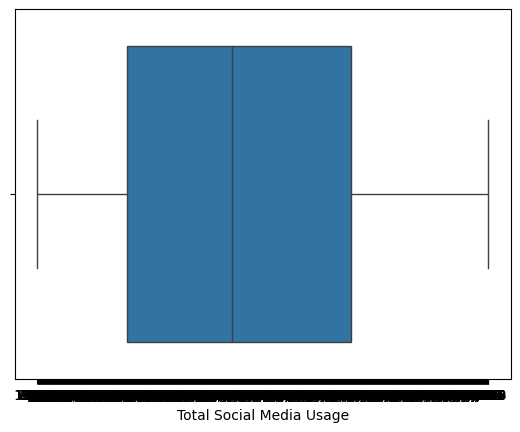

In [ ]:
sns.boxplot(x=df["Total Social Media Usage"])

###Classification with 80-20


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Encode Categorical Variables
label_encoder = LabelEncoder()
df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Step 2: Split Data into Features (X) and Target (y)
X = df_encoded.drop(columns=['Current Status'])
y = df_encoded['Current Status']

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Initialize and Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    # Calculate testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_accuracy:.2f}")
    print(f"  Testing Accuracy: {test_accuracy:.2f}")
    print(f"  Classification Report:")
    print(classification_report(y_test, y_test_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Logistic Regression:
  Training Accuracy: 0.70
  Testing Accuracy: 0.66
  Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.02      0.04        48
           1       0.00      0.00      0.00         1
           2       0.70      0.69      0.69       129
           3       0.64      0.84      0.73       148

    accuracy                           0.66       326
   macro avg       0.42      0.39      0.37       326
weighted avg       0.62      0.66      0.61       326

SVM:
  Training Accuracy: 0.57
  Testing Accuracy: 0.48
  Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.00      0.00      0.00         1
           2       0.46      0.26      0.33       129
           3       0.48      0.83      0.61       148

    accuracy                           0.48       326
   macro avg       0.24      0.27      0.24       326
weighte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 4: Initialize and Train Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multilayer Perceptron": MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    # Calculate testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_accuracy:.2f}")
    print(f"  Testing Accuracy: {test_accuracy:.2f}")
    print(f"  Classification Report:")
    print(classification_report(y_test, y_test_pred))


Random Forest:
  Training Accuracy: 1.00
  Testing Accuracy: 0.69
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        48
           1       0.00      0.00      0.00         1
           2       0.77      0.72      0.74       129
           3       0.64      0.88      0.74       148

    accuracy                           0.69       326
   macro avg       0.60      0.41      0.38       326
weighted avg       0.74      0.69      0.64       326



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting:
  Training Accuracy: 0.89
  Testing Accuracy: 0.66
  Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.06      0.11        48
           1       0.00      0.00      0.00         1
           2       0.72      0.70      0.71       129
           3       0.63      0.83      0.72       148

    accuracy                           0.66       326
   macro avg       0.45      0.40      0.38       326
weighted avg       0.64      0.66      0.62       326

Decision Tree:
  Training Accuracy: 1.00
  Testing Accuracy: 0.59
  Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.17      0.21        48
           1       0.00      0.00      0.00         1
           2       0.67      0.65      0.66       129
           3       0.58      0.68      0.63       148

    accuracy                           0.59       326
   macro avg       0.38      0.37      0.37       326

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multilayer Perceptron:
  Training Accuracy: 0.65
  Testing Accuracy: 0.51
  Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.29      0.24        48
           1       0.00      0.00      0.00         1
           2       0.61      0.55      0.58       129
           3       0.59      0.55      0.57       148

    accuracy                           0.51       326
   macro avg       0.35      0.35      0.35       326
weighted avg       0.54      0.51      0.52       326



###70-30

In [ ]:
# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 4: Initialize and Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    # Calculate testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_accuracy:.2f}")
    print(f"  Testing Accuracy: {test_accuracy:.2f}")
    print(f"  Classification Report:")
    print(classification_report(y_test, y_test_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Logistic Regression:
  Training Accuracy: 0.69
  Testing Accuracy: 0.68
  Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.02      0.03        66
           1       0.00      0.00      0.00         1
           2       0.71      0.74      0.73       194
           3       0.67      0.83      0.74       228

    accuracy                           0.68       489
   macro avg       0.41      0.40      0.37       489
weighted avg       0.63      0.68      0.64       489

SVM:
  Training Accuracy: 0.56
  Testing Accuracy: 0.49
  Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00         1
           2       0.48      0.24      0.32       194
           3       0.49      0.86      0.63       228

    accuracy                           0.49       489
   macro avg       0.24      0.27      0.24       489
weighte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Step 4: Initialize and Train Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multilayer Perceptron": MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    # Calculate testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_accuracy:.2f}")
    print(f"  Testing Accuracy: {test_accuracy:.2f}")
    print(f"  Classification Report:")
    print(classification_report(y_test, y_test_pred))


Random Forest:
  Training Accuracy: 1.00
  Testing Accuracy: 0.68
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        66
           1       0.00      0.00      0.00         1
           2       0.72      0.70      0.71       194
           3       0.65      0.86      0.74       228

    accuracy                           0.68       489
   macro avg       0.59      0.40      0.38       489
weighted avg       0.72      0.68      0.63       489



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting:
  Training Accuracy: 0.92
  Testing Accuracy: 0.68
  Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.06      0.11        66
           1       0.00      0.00      0.00         1
           2       0.69      0.73      0.71       194
           3       0.68      0.82      0.75       228

    accuracy                           0.68       489
   macro avg       0.46      0.40      0.39       489
weighted avg       0.65      0.68      0.64       489

Decision Tree:
  Training Accuracy: 1.00
  Testing Accuracy: 0.59
  Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.15      0.18        66
           1       0.00      0.00      0.00         1
           2       0.67      0.62      0.64       194
           3       0.59      0.69      0.64       228

    accuracy                           0.59       489
   macro avg       0.37      0.36      0.37       489

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multilayer Perceptron:
  Training Accuracy: 0.62
  Testing Accuracy: 0.48
  Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.12      0.16        66
           1       0.00      0.00      0.00         1
           2       0.53      0.22      0.31       194
           3       0.50      0.80      0.61       228

    accuracy                           0.48       489
   macro avg       0.32      0.29      0.27       489
weighted avg       0.47      0.48      0.43       489



###60-40

In [ ]:
# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Step 4: Initialize and Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    # Calculate testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_accuracy:.2f}")
    print(f"  Testing Accuracy: {test_accuracy:.2f}")
    print(f"  Classification Report:")
    print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Logistic Regression:
  Training Accuracy: 0.70
  Testing Accuracy: 0.68
  Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.01      0.02        85
           1       0.00      0.00      0.00         1
           2       0.66      0.76      0.71       250
           3       0.70      0.79      0.74       316

    accuracy                           0.68       652
   macro avg       0.39      0.39      0.37       652
weighted avg       0.62      0.68      0.63       652

SVM:
  Training Accuracy: 0.58
  Testing Accuracy: 0.52
  Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.00      0.00      0.00         1
           2       0.48      0.33      0.39       250
           3       0.53      0.81      0.64       316

    accuracy                           0.52       652
   macro avg       0.25      0.28      0.26       652
weighte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Step 4: Initialize and Train Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multilayer Perceptron": MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    # Calculate testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_accuracy:.2f}")
    print(f"  Testing Accuracy: {test_accuracy:.2f}")
    print(f"  Classification Report:")
    print(classification_report(y_test, y_test_pred))


Random Forest:
  Training Accuracy: 1.00
  Testing Accuracy: 0.67
  Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        85
           1       0.00      0.00      0.00         1
           2       0.68      0.72      0.70       250
           3       0.67      0.81      0.73       316

    accuracy                           0.67       652
   macro avg       0.46      0.39      0.37       652
weighted avg       0.65      0.67      0.63       652



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting:
  Training Accuracy: 0.93
  Testing Accuracy: 0.66
  Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.06      0.10        85
           1       0.00      0.00      0.00         1
           2       0.65      0.71      0.68       250
           3       0.69      0.78      0.73       316

    accuracy                           0.66       652
   macro avg       0.42      0.39      0.38       652
weighted avg       0.63      0.66      0.63       652

Decision Tree:
  Training Accuracy: 1.00
  Testing Accuracy: 0.58
  Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.16      0.19        85
           1       0.00      0.00      0.00         1
           2       0.63      0.61      0.62       250
           3       0.62      0.67      0.64       316

    accuracy                           0.58       652
   macro avg       0.37      0.36      0.36       652

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)
print(X_test)

[0 3 3 2 3 2 0 3 2 2 3 3 2 2 3 3 3 3 3 2 3 3 3 2 3 0 3 2 2 3 3 0 2 3 3 0 2
 3 3 2 2 3 0 2 0 2 3 2 2 2 2 2 2 3 2 3 2 3 2 2 3 3 3 3 3 2 2 3 3 3 3 3 2 3
 2 0 0 3 2 2 2 2 3 2 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 3 2 2 3 2 3 3 3 2 3 3
 3 3 2 3 3 3 2 2 0 2 3 3 0 3 0 2 3 3 3 3 2 3 3 2 2 2 3 2 2 2 2 3 0 2 3 3 2
 2 3 3 2 3 2 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3 3 3 3 3 2 3 2 3 0 0 3 2 3 3 2 2
 0 2 2 2 3 3 2 2 3 2 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 0 3 0 3 2 3 3 2 2 2 3 3
 2 2 2 3 2 0 2 3 2 2 3 3 2 2 3 0 2 3 3 2 3 3 3 2 3 3 3 3 2 3 2 3 0 2 2 0 1
 3 3 2 0 3 0 2 0 3 3 2 2 2 3 2 3 2 3 3 2 3 3 3 3 3 2 0 0 2 3 3 2 2 2 3 3 2
 2 0 3 2 2 3 0 3 3 2 2 2 2 3 3 2 0 2 0 3 3 2 0 0 3 2 0 3 2 3 2 0 3 2 0 0 3
 3 2 3 3 2 3 3 2 3 3 3 3 2 3 3 2 0 2 2 2 2 3 2 3 3 2 2 3 3 0 3 2 3 3 2 2 2
 3 3 2 2 3 3 2 2 3 2 3 2 3 3 2 2 3 3 2 3 3 3 3 3 3 3 2 3 2 0 3 3 3 3 3 3 3
 3 2 2 3 3 1 2 3 0 0 3 3 3 3 0 3 3 2 2 0 0 2 2 3 3 3 3 3 3 2 2 3 2 3 2 3 3
 2 3 3 3 2 2 3 3 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 2 2 2 3 2 2 0 2 2 3 2 3 3 2
 2 3 3 3 0 3 3 2 3 2 0 3 

In [ ]:
# Step 2: Split Data into Features (X) and Target (y)
X = df_encoded.drop(columns=['Current Status'])
y = df_encoded['Current Status']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
model.fit(X_train, y_train)
   # Calculate training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
    # Calculate testing accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"  Training Accuracy: {train_accuracy:.2f}")
print(f"  Testing Accuracy: {test_accuracy:.2f}")
print(f"  Classification Report:")
print(classification_report(y_test, y_test_pred))


  Training Accuracy: 0.92
  Testing Accuracy: 0.68
  Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        66
           1       0.00      0.00      0.00         1
           2       0.69      0.73      0.71       194
           3       0.68      0.82      0.75       228

    accuracy                           0.68       489
   macro avg       0.47      0.40      0.39       489
weighted avg       0.66      0.68      0.64       489



In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

[2 2 3 2 2 3 3 3 2 3 3 2 3 3 3 2 2 3 2 3 3 3 3 2 2 3 2 2 3 3 3 3 3 3 3 2 2
 2 3 3 3 3 0 3 3 2 3 2 3 2 3 3 3 2 3 3 3 3 3 2 3 2 2 3 2 3 2 3 3 3 3 2 3 3
 2 3 3 3 3 0 3 3 3 3 2 3 2 3 2 3 2 3 3 3 2 2 3 3 2 3 2 3 3 2 2 3 2 2 2 2 3
 3 2 3 2 3 2 2 3 3 2 2 2 2 3 2 3 3 2 3 3 3 2 2 2 2 2 0 2 2 3 3 2 3 3 2 3 3
 2 3 3 2 2 2 2 3 3 3 2 2 3 3 3 2 2 3 3 2 2 3 2 3 2 2 2 2 3 3 3 2 3 3 2 3 2
 3 2 3 2 3 3 2 2 3 2 3 2 3 3 3 0 3 3 2 3 0 2 3 3 3 3 3 2 3 2 3 3 2 3 2 3 3
 3 3 2 3 3 2 2 3 3 3 2 2 3 2 3 3 2 3 2 3 3 3 3 3 3 2 2 2 3 3 3 3 3 2 2 2 3
 2 3 3 3 3 3 2 3 3 3 2 2 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 2 2 2 3 2 2 3 3 2 3
 2 2 3 2 2 2 3 2 3 2 2 2 3 2 3 2 3 3 3 2 3 3 3 2 3 2 2 2 2 3 3 2 3 2 2 2 3
 3 2 3 3 3 3 3 2 2 3 3 3 2 3 2 2 3 3 3 2 3 3 2 3 3 2 3 3 3 3 3 3 2 3 2 2 3
 3 2 2 2 2 2 3 2 2 2 2 2 2 3 3 2 3 3 3 3 3 3 3 2 3 3 2 3 2 3 2 3 3 2 3 3 2
 2 3 2 2 2 2 2 3 3 3 2 3 3 3 3 2 0 2 2 2 2 2 3 3 3 0 3 2 2 1 2 3 3 3 2 2 3
 2 3 3 2 3 2 2 3 3 2 2 3 3 2 3 3 3 3 3 2 2 2 3 3 2 3 0 2 2 3 2 2 3 3 3 3 2
 3 3 3 2 2 3 3 3]


In [ ]:
# predictions using numbers
print(model.predict([[39,18,0,0,0,16,2,5,3,0,0,28.65,77.23,6000,2160,0,0,421,121,431,0,407,357,388,714]]))
y_predict=model.predict(X_test)

[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(model.predict([[26,8,1,0,0,8,0,11,4,485,16,12.97,77.58,1500,1500,146,108,111,18,205,435,391,716,472,444]]))
y_predict=model.predict(X_test)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(model.predict([[24,18,1,1,2,16,2,5,3,200,10,18.513,73.84,0,0,0,0,0,128,0,0,87,0,223,86]]))
y_predict=model.predict(X_test)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
 #random# Assuming you have already trained your model (gbm) as shown in the previous example

import numpy as np

# Example input data with 25 features
# Here, we generate synthetic input data as an example
input_data = np.random.rand(1, 25)  # Generating random data for demonstration purposes

# Make prediction using the trained model
output_prediction = model.predict(input_data)

print("Output prediction:", output_prediction)


Output prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
